In [ ]:
# Day 4 — Basic Plotting in Matplotlib (Histograms & Scatter)

**Goal:** practice matplotlib basics using an environmental dataset (pH, pollutant concentrations).

**Tasks**
1) Load + preview data  
2) Quick quality checks (types, missing)  
3) Histogram(s) (pH, nitrate)  
4) Scatter plot (pH vs. nitrate)  
5) Save figures to disk


In [3]:
#Imports and global config
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

#Make plots a little sharper by default (optional)
plt.rcParams.update({
    "figure.figsize": (7,5),
    "figure.dpi": 120,
    "axes.grid": True
})

#Where to save figures
FIG_DIR = Path("figures")
FIG_DIR.mkdir(exist_ok=True)

In [ ]:
# Load Data
csv_path = "week1_task4_sample_water_quality.csv" #file is in same folder as this notebook

df = pd.read_csv(csv_path, parse_dates=["date"]) #formats the values in the "date" column from plain text to datetime objects
print(f"Rows: {len(df):,}") #f"..." means will be evaluated as python expression, prints Rows: (number of rows in df), the ":," means separate thousands by commas ie. 1,000
df.head()

Rows: 300


,sample_id,date,site,pH,nitrate_mg_L,phosphate_mg_L,turbidity_NTU,temperature_C,dissolved_oxygen_mg_L
0,1,2024-06-27,Site_B,6.92,1.179,0.027,7.45,16.97,8.60
1,2,2025-01-19,Site_E,7.04,3.089,0.051,4.44,16.07,10.03
2,3,2024-12-14,Site_A,6.95,0.425,0.103,11.13,11.30,4.68
3,4,2024-10-10,Site_E,7.19,1.190,0.128,9.03,14.86,7.98
4,5,2024-10-08,Site_C,7.98,3.578,0.144,3.97,11.26,8.55


In [11]:
#Quick Peek and Data Health
#Column overview
df.info()

#Quick numeric summary
display(df.describe().T)    #.describe() computers summary statistics for each column, .T "transposes" the columns and rows

#Missing values check (focus on columns we'll plot)
cols_of_interest = ["pH", "nitrate_mg_L"]
missing = df[cols_of_interest].isna().sum()
print("Missing values:\n", missing)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   sample_id              300 non-null    int64         
 1   date                   300 non-null    datetime64[ns]
 2   site                   300 non-null    object        
 3   pH                     291 non-null    float64       
 4   nitrate_mg_L           291 non-null    float64       
 5   phosphate_mg_L         291 non-null    float64       
 6   turbidity_NTU          300 non-null    float64       
 7   temperature_C          300 non-null    float64       
 8   dissolved_oxygen_mg_L  300 non-null    float64       
dtypes: datetime64[ns](1), float64(6), int64(1), object(1)
memory usage: 21.2+ KB


,count,mean,min,25%,50%,75%,max,std
sample_id,300.0,150.5,1.0,75.75,150.5,225.25,300.0,86.746758
date,300,2024-10-28 06:24:00,2024-06-03 00:00:00,2024-08-22 18:00:00,2024-10-26 12:00:00,2025-01-04 00:00:00,2025-03-26 00:00:00,NaN
pH,291.0,7.086014,5.5,6.68,7.12,7.5,8.66,0.603841
nitrate_mg_L,291.0,1.243086,0.154,0.6,0.991,1.5435,9.255,1.011171
phosphate_mg_L,291.0,0.267275,0.011,0.126,0.206,0.327,1.893,0.232746
turbidity_NTU,300.0,5.385567,0.2,2.3075,5.135,8.005,15.84,3.767
temperature_C,300.0,14.119367,0.1,10.16,14.14,18.085,32.49,6.116252
dissolved_oxygen_mg_L,300.0,7.6993,1.9,6.43,7.905,9.03,13.71,1.935353


Missing values:
 pH              9
nitrate_mg_L    9
dtype: int64


In [12]:
#Light Cleaning/Filtering

#Keep only plausible pH and Nitrate ranges; drop rows missing our plot columns
clean = df.copy()

#Reasonable pH range for natural waters
clean = clean[(clean["pH"] >= 0) & (clean["pH"] <= 14)]

#Reasonable nitrate range (adjust to your domain)
clean = clean[(clean["nitrate_mg_L"] >= 0) & (clean["nitrate_mg_L"] <= 50)]

#Drop rows with NaN in our columns of interest
clean = clean.dropna(subset=["pH", "nitrate_mg_L"]).copy()

print(f"Rows after cleaning: {len(clean):,}")
clean[["pH", "nitrate_mg_L"]].describe().T

Rows after cleaning: 282


,count,mean,std,min,25%,50%,75%,max
pH,282.0,7.081631,0.600366,5.500,6.6800,7.1150,7.4800,8.660
nitrate_mg_L,282.0,1.239872,1.011748,0.154,0.5965,0.9905,1.5305,9.255


In [ ]:
## Histograms
We’ll do:
- pH distribution
- Nitrate (mg/L) distribution

Notes:
- Adjust `bins` to see more/less detail.
- Add mean/median lines to read distribution at a glance.

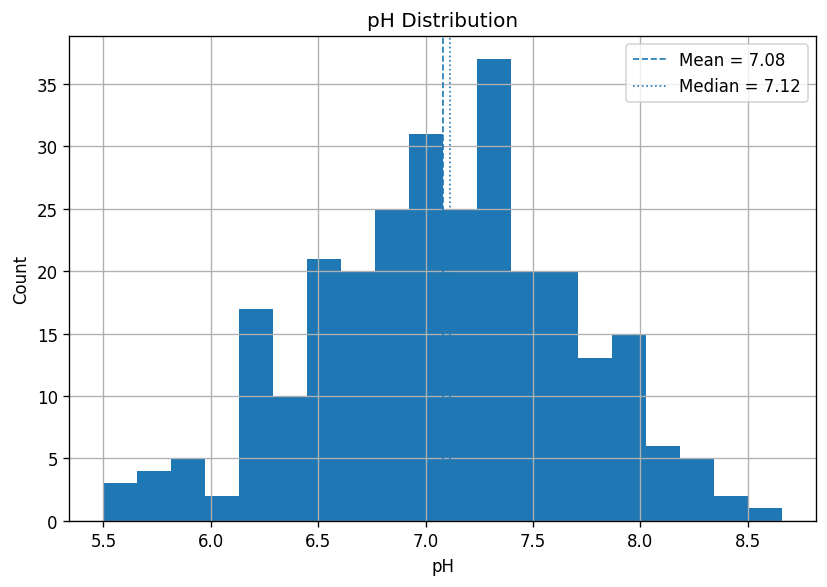

In [ ]:
#Histogram: pH
series = clean["pH"] #didnt include .dropna() b/c I believe we already did this above

fig, ax = plt.subplots() #fig is figure window, ax is chart area
ax.hist(series, bins=20)
ax.set_title("pH Distribution")
ax.set_xlabel("pH")
ax.set_ylabel("Count")

#Annotate mean and median
mean_val = series.mean()
median_val = series.median()
ax.axvline(mean_val, linestyle= "--", linewidth=1, label=f"Mean = {mean_val:.2f}") #axvline = "draw vertical line on plot", arguments modify this line
ax.axvline(median_val, linestyle= ":", linewidth=1, label=f"Median = {median_val:.2f}") #.2f means value to two decimal places, f"..." is called an f-string (used for formatting in this case)
ax.legend()

fig.tight_layout()
fig.savefig(FIG_DIR / "hist_pH.png")

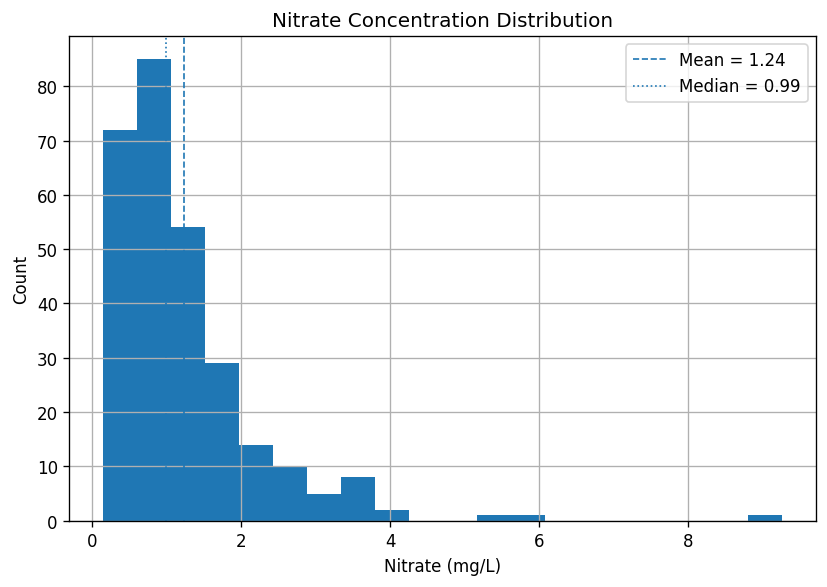

In [ ]:
#Histogram: Nitrate (mg/L)
series = clean["nitrate_mg_L"] #didnt include .dropna() b/c I believe we already did this above

fig, ax = plt.subplots() #fig is figure window, ax is chart area
ax.hist(series, bins=20)
ax.set_title("Nitrate Concentration Distribution")
ax.set_xlabel("Nitrate (mg/L)")
ax.set_ylabel("Count")

#Annotate mean and median
mean_val = series.mean()
median_val = series.median()
ax.axvline(mean_val, linestyle= "--", linewidth=1, label=f"Mean = {mean_val:.2f}") #axvline = "draw vertical line on plot", arguments modify this line
ax.axvline(median_val, linestyle= ":", linewidth=1, label=f"Median = {median_val:.2f}") #.2f means value to two decimal places, f"..." is called an f-string (used for formatting in this case)
ax.legend()

fig.tight_layout()
fig.savefig(FIG_DIR / "hist_nitrate.png")

In [ ]:
## Scatter Plot
We’ll visualize the relationship between pH and nitrate.  
(Optional): add a simple linear trend line using `numpy.polyfit`.

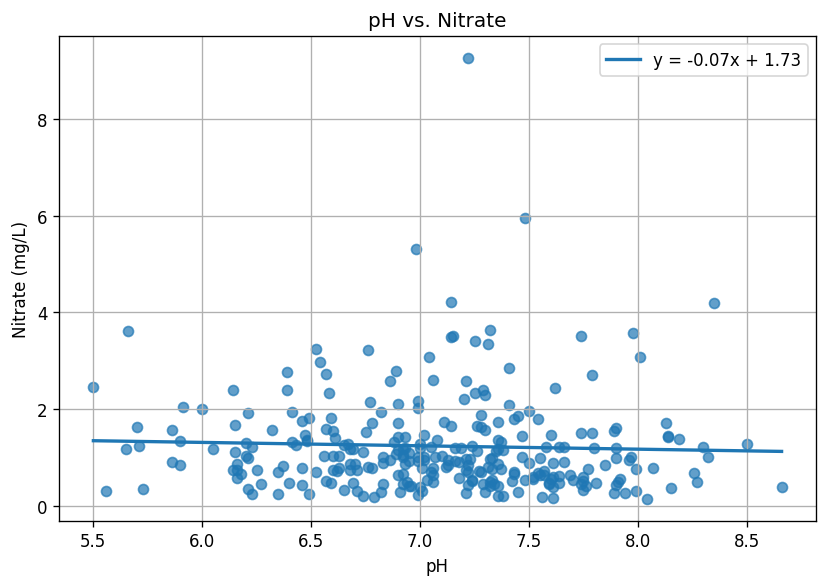

In [24]:
#Scatter: pH vs Nitrate (+optional trend line)
x = clean["pH"].to_numpy()
y = clean["nitrate_mg_L"].to_numpy()

fig, ax = plt.subplots()
ax.scatter(x, y, alpha=0.7)
ax.set_title("pH vs. Nitrate")
ax.set_xlabel("pH")
ax.set_ylabel("Nitrate (mg/L)")

#optional: simple linear trend line
m, b = np.polyfit(x, y, deg=1)
xline = np.linspace(x.min(), x.max(), 100)
yline = m * xline + b
ax.plot(xline, yline, linewidth=2, label=f"y = {m:.2f}x + {b:.2f}")
ax.legend()

fig.tight_layout()
fig.savefig(FIG_DIR / "scatter_pH_vs_nitrate.png")



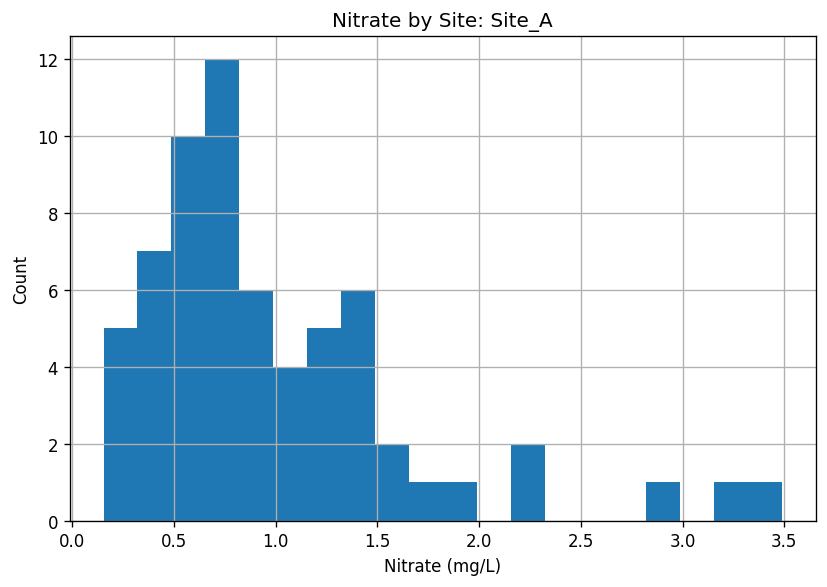

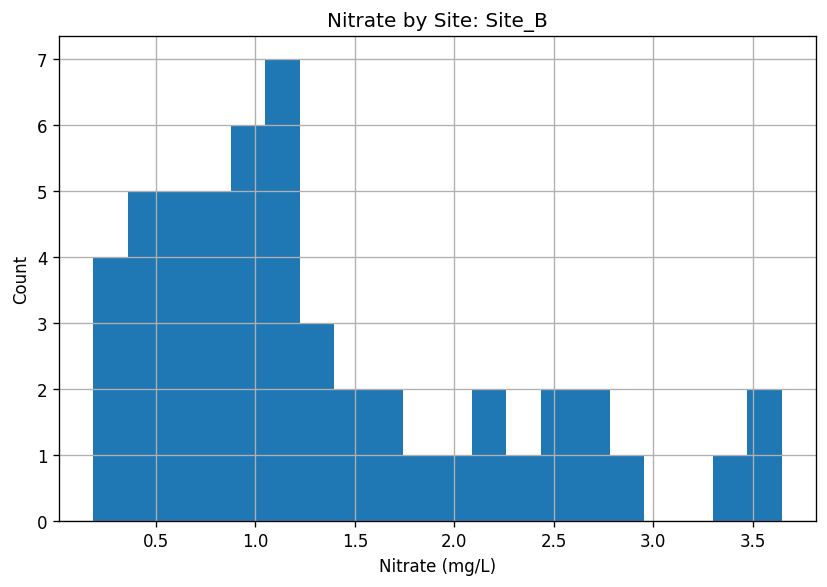

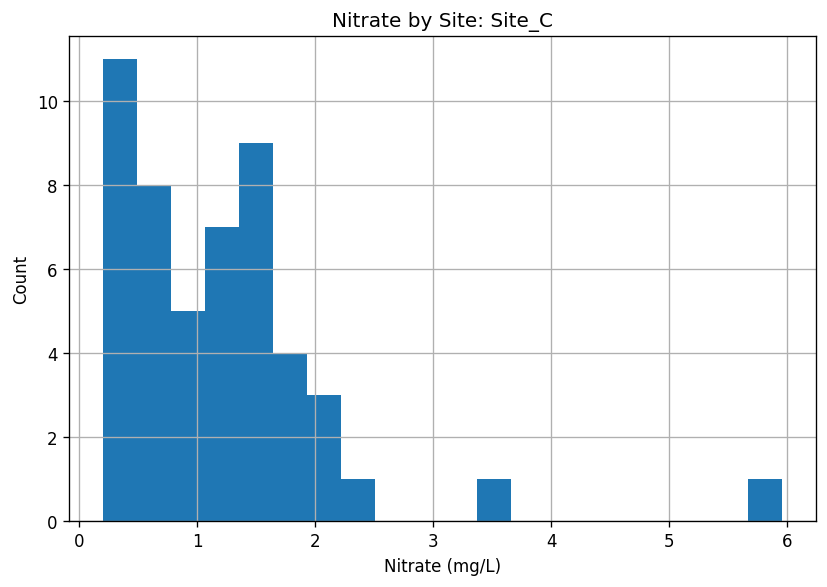

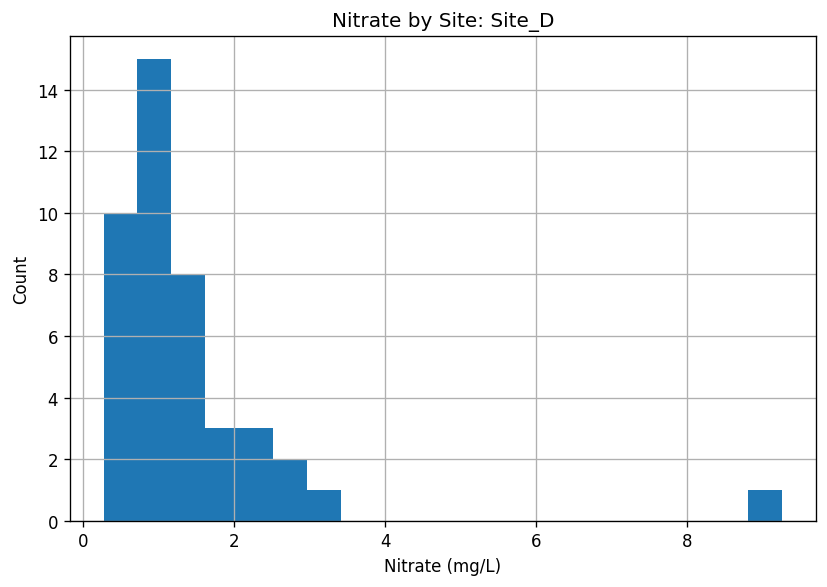

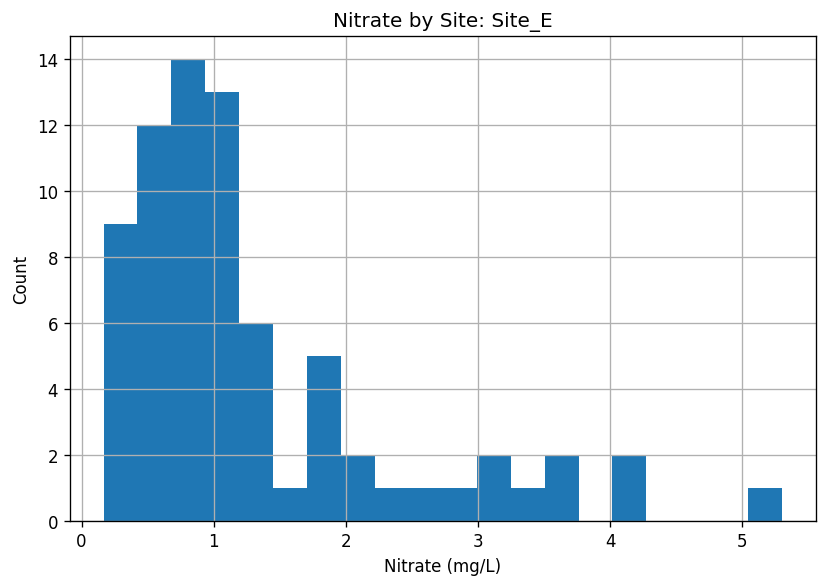

In [25]:
# If you have a 'site' column, try separate histograms by site with a simple loop.
# This stays “basic matplotlib” by making one figure per site

if "site" in clean.columns:
    for site, sub in clean.groupby("site"):
        fig, ax = plt.subplots()
        ax.hist(sub["nitrate_mg_L"].dropna(), bins=20)
        ax.set_title(f"Nitrate by Site: {site}")
        ax.set_xlabel("Nitrate (mg/L)")
        ax.set_ylabel("Count")
        fig.tight_layout()
        fig.savefig(FIG_DIR / f"hist_nitrate_{site}.png")